In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the data
data = pd.read_csv('speeches_spx_combined.csv')
data = data.dropna()

# Clean and process the text data
data['text'] = data['text'].str.replace('[^a-zA-Z]', ' ')
data['text'] = data['text'].apply(lambda x: ' '.join([w.lower() for w in x.split() if len(w) > 3]))

# Extract features from the speech data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
speech_features = vectorizer.fit_transform(data['text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(speech_features, data['change'], test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:")
print(confusion)

C:\Users\anton\AppData\Local\Temp\ipykernel_6852\3486408576.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[^a-zA-Z]', ' ')


Accuracy: 0.5263157894736842
Confusion matrix:
[[ 45  96]
 [ 48 115]]


<AxesSubplot:>

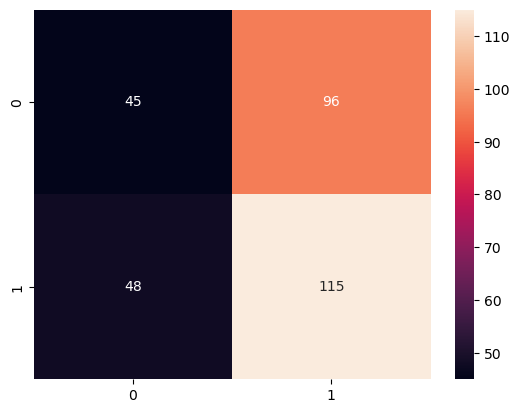

In [8]:
import seaborn as sns

sns.heatmap(data=confusion, annot=True, fmt='g')

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(data)
vectorizer.vocabulary_

vectorizer.transform(data).toarray()

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split

text = data['text'].values
y = data['change'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(text, y, test_size=0.25, random_state=1000)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<1137x37287 sparse matrix of type '<class 'numpy.int64'>'
	with 973111 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [16]:
score

0.48284960422163586

In [ ]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()